In [3]:
import rasterio
import numpy as np

# Specify the path to your raster image
image_path = '/mnt/storage/datmh/AI4SmallFarms/input/asia/train/masks/63_vietnam.tif'  # Replace with your image path

# Open the image using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read(1)  # This reads all bands into a 3D array (bands, height, width)
    print(np.min(image_data))

    # Get the shape of the image data
    shape = image_data.shape  # This will return (bands, height, width)

    # Print the shape
    print("Image shape (bands, height, width):", shape)

    # If you want to check other properties
    print("Width:", src.width)
    print("Height:", src.height)
    print("Number of bands:", src.count)

0
Image shape (bands, height, width): (4384, 4162)
Width: 4162
Height: 4384
Number of bands: 1


In [8]:
import os
folders = ["test", "train", "validate"]

st = set()
for folder in folders:
    for image in os.listdir("/mnt/data1tb/FieldBoundary/AI4SmallFarms/input/asia/"+folder+"/images"):
        # Specify the path to your raster image
        image_path = "/mnt/data1tb/FieldBoundary/AI4SmallFarms/input/asia/"+folder+"/images/"+image  # Replace with your image path

        # Open the image using rasterio
        with rasterio.open(image_path) as src:
            # Read the image data
            image_data = src.read()  # This reads all bands into a 3D array (bands, height, width)

            # Get the shape of the image data
            shape = image_data.shape  # This will return (bands, height, width)
            st.add(shape)
for value in st:
    if value[0] != 4:
        print(value)

In [6]:
import rasterio

# Define the path to your TIFF file
tif_file_path = "/mnt/storage/datmh/AI4SmallFarms/input/asia/train/images/0_vietnam.tif" # Replace with your actual file path

# Open the TIFF file
with rasterio.open(tif_file_path) as src:
    # Print the metadata of the raster
    print("Metadata:")
    print(src.meta)

    # Check and print the number of bands
    num_bands = src.count
    print(f"Number of bands: {num_bands}")

    # Retrieve and print band names if available
    band_names = src.descriptions  # This will give you band names if they are set
    for i, name in enumerate(band_names, start=1):
        print(f"Band {i} Name: {name if name else 'No name assigned'}")

Metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 750, 'height': 764, 'count': 3, 'crs': CRS.from_epsg(32648), 'transform': Affine(9.351281157839514, 0.0, 612388.7872075482,
       0.0, -9.939146778162288, 2309068.636034609)}
Number of bands: 3
Band 1 Name: No name assigned
Band 2 Name: No name assigned
Band 3 Name: No name assigned


(6584, 6052)
(512, 512)


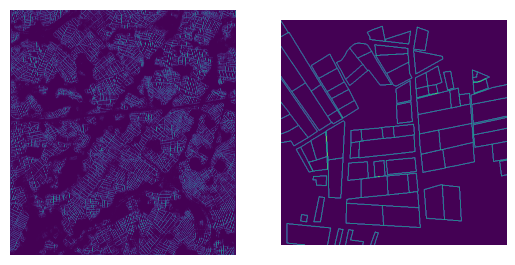

0


In [7]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

src = rasterio.open("/mnt/storage/datmh/AI4SmallFarms/input/asia/test/patches/mosaic/65.tif")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(src.read(1))
print(src.read(1).shape)
plt.axis('off')  # Optional: turn off axis numbers and ticks
src = rasterio.open("/mnt/storage/datmh/AI4SmallFarms/input/asia/test/patches/masks/mask_256_0_65_vietnam.tif")
plt.subplot(1, 2, 2)
plt.imshow(src.read(1))
print(src.read(1).shape)
plt.axis('off') 
plt.show()
print(np.min(src.read(1)))

# src = rasterio.open("/mnt/data1tb/FieldBoundary/AI4SmallFarms/input/asia/validate/masks/9_cambodia.tif")
# show(src.read(1))  # Change cmap to any preferred colormap

In [3]:
import rasterio
import numpy as np
import os

# Define the folder names
folders = ["test", "train", "validate"]

# Loop through each folder
for folder in folders:
    # Loop through each image in the specified directory
    for image in os.listdir(f"/mnt/storage/datmh/AI4SmallFarms/input/asia/{folder}/images"):
        # Define the input and output file paths
        input_tif_path = f"/mnt/storage/datmh/AI4SmallFarms/input/asia/{folder}/images/{image}"
        output_tif_path = f"/mnt/storage/datmh/AI4SmallFarms/input/asia/{folder}/images/{image}"

        # Open the input TIFF file
        with rasterio.open(input_tif_path) as src:
            # Read all bands except band 4
            bands = [src.read(i) for i in range(1, src.count + 1) if i != 4]

            # Update the metadata for the new file
            profile = src.profile
            profile.update({
                'count': len(bands),  # Update the count of bands
                'dtype': bands[0].dtype  # Ensure data type is consistent
            })

            # Write the new TIFF file with the remaining bands
            with rasterio.open(output_tif_path, 'w', **profile) as dst:
                for i, band in enumerate(bands, start=1):
                    dst.write(band, i)

print("Processing complete.")

Processing complete.


In [18]:
from deep_learning_models.utils.data_generator import DataGenerator

data_path = '/mnt/storage/datmh/AI4SmallFarms/input/asia/train/patches'
data_gen = DataGenerator(data_path)
x, y = data_gen.__getitem__(10)

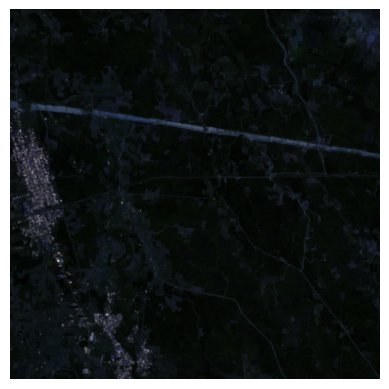

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x[0])
plt.axis('off')
plt.show()

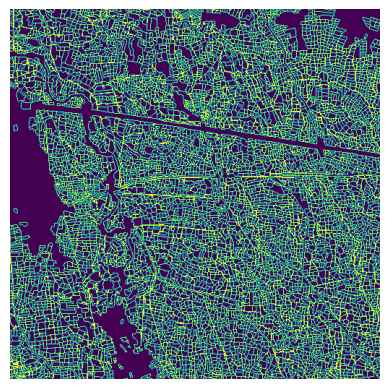

In [20]:
plt.imshow(y[0])
plt.axis('off')
plt.show()

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-12-05 13:57:08.619335: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-05 13:57:08.623761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-12-05 13:57:08.623854: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [5]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [12]:
from PIL import Image
import numpy as np


for image_name in os.listdir("/mnt/storage/datmh/AI4SmallFarms/input/asia/train/masks"):
    # Load the TIFF image
    image = Image.open("/mnt/storage/datmh/AI4SmallFarms/input/asia/train/masks/"+image_name)

    # Convert image to numpy array
    image_array = np.array(image)

    # Multiply all pixels by 255
    multiplied_array = image_array * 255

    # Ensure values are in the correct range (0-255)
    multiplied_array = np.clip(multiplied_array, 0, 255).astype(np.uint8)

    # Convert back to an image
    multiplied_image = Image.fromarray(multiplied_array)

    # Save the new image
    multiplied_image.save("/mnt/storage/datmh/AI4SmallFarms/input/asia/train/masks/"+image_name)


In [1]:
import os
import shutil

input = "/mnt/storage/datmh/AI4SmallFarms/datasets/images"
i = 62
output = "/mnt/storage/datmh/AI4SmallFarms/input/asia/train/images"
for image in os.listdir(input):
    image_path = os.path.join(input, image)
    mask_path = os.path.join(input.replace("images", "masks"), image[:-4]+"_GT.tif")
    output_image_path = os.path.join(output, f"{i}_vietnam.tif")
    output_mask_path = os.path.join(output.replace("images", "masks"), f"{i}_vietnam.tif")
    i += 1
    shutil.copy(image_path, output_image_path)
    shutil.copy(mask_path, output_mask_path)

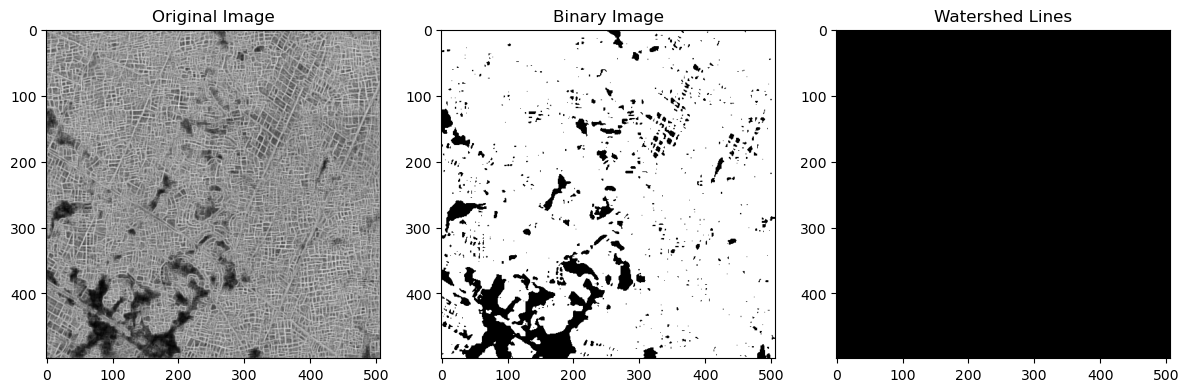

True

In [21]:
import cv2
import numpy as np
from skimage.io import imread
from skimage.segmentation import watershed
from scipy.ndimage import label, distance_transform_edt
import matplotlib.pyplot as plt

# Load the single-band TIFF image
input_image_path = "/mnt/storage/datmh/AI4SmallFarms/input/asia2/test/output/dl_model_output/8.tif"
image = imread(input_image_path)

# Ensure the image is 2D (single band)
if len(image.shape) > 2:
    raise ValueError("The input image must be a single-band (grayscale) image.")

# Convert the image from float (0 to 1) to 8-bit
if image.dtype != np.uint8:
    image = (255 * np.clip(image, 0, 1)).astype(np.uint8)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Compute the distance transform
distance = distance_transform_edt(binary)

# Identify local maxima as markers for watershed
local_max = (distance > 0.7 * distance.max()).astype(np.uint8)
markers, _ = label(local_max)

# Apply watershed segmentation
labels = watershed(-distance, markers, mask=binary)

# Generate watershed lines
watershed_lines = np.zeros_like(labels, dtype=np.uint8)
watershed_lines[labels == -1] = 255

# Save or display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Binary Image")
plt.imshow(binary, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Watershed Lines")
plt.imshow(watershed_lines, cmap="gray")

plt.tight_layout()
plt.show()

# Save watershed lines to a file (optional)
output_image_path = "/mnt/storage/datmh/AI4SmallFarms/input/asia2/test/output/dl_model_output/8_watershed_lines.tif"
cv2.imwrite(output_image_path, watershed_lines)


In [4]:
print(len(os.listdir("/mnt/storage/datmh/AI4SmallFarms/input/asia/train/patches/images")))

898


In [5]:
import imagej

# Initialize ImageJ
ij = imagej.init('sc.fiji:fiji', mode='interactive')


ExecutableNotFound: mvn not found on path /home/nhatvm/anaconda3/envs/ai4small/bin:/usr/local/cuda-12.4/bin:/home/nhatvm/.vscode-server/cli/servers/Stable-e8653663e8840adaf45af01eab5c627a5af81807/server/bin/remote-cli:/usr/local/cuda-11.2/bin:/home/nhatvm/google-cloud-sdk/bin:/home/nhatvm/anaconda3/envs/ai4small/bin:/home/nhatvm/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin